In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
sns.set()
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
pd.options.display.max_rows = 16

In [3]:
canada = pd.read_csv('canada.csv')

In [33]:
#canada.info()

In [4]:
redundant_columns = ['prname','prnameFR']
canada.drop(redundant_columns, axis=1, inplace=True)

In [5]:
canada.head()

,pruid,date,update,numconf,numprob,numdeaths,numtotal,numtested,numtests,numrecover,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
0,35,2020-01-31,NaN,3,0.0,0.0,3,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,59,2020-01-31,NaN,1,0.0,0.0,1,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1,2020-01-31,NaN,4,0.0,0.0,4,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,35,2020-02-08,NaN,3,0.0,0.0,3,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,59,2020-02-08,NaN,4,0.0,0.0,4,NaN,63,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [6]:
canadaLockdownDate = pd.read_csv('canadaLockdownDate.csv')

## Joining two dataset Canada and Lockdown date

In [7]:
bothDF = pd.merge(canada,canadaLockdownDate, how='outer',left_on=['pruid','date'], right_on = ['provinceID','lockdate'])

In [8]:
bothDF.head(n=100)

,pruid,date,update,numconf,numprob,numdeaths,numtotal,numtested,numtests,numrecover,...,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered,provinceID,lockdate,label
0,35,2020-01-31,NaN,3,0.0,0.0,3,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,59,2020-01-31,NaN,1,0.0,0.0,1,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,1,2020-01-31,NaN,4,0.0,0.0,4,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,35,2020-02-08,NaN,3,0.0,0.0,3,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,59,2020-02-08,NaN,4,0.0,0.0,4,NaN,63,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12,2020-03-13,NaN,0,0.0,0.0,0,182.0,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.0,2020-03-13,1.0
96,11,2020-03-13,NaN,0,0.0,0.0,0,6.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
97,60,2020-03-13,NaN,0,0.0,0.0,0,0.0,36,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
98,61,2020-03-13,NaN,0,0.0,0.0,0,34.0,24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [9]:
bothDF.drop(['provinceID','lockdate'], axis=1, inplace=True)

In [10]:
bothDF['date'] = pd.to_datetime(bothDF['date'])
bothDF["date"] = pd.to_datetime(bothDF["date"]).dt.strftime("%Y%m%d")

In [37]:
#
# Perform one-hot encoding
#
#categorical_columns = canada.columns[canada.dtypes == object] 
# Find all categorical columns
#canada = pd.get_dummies(canada, columns = categorical_columns, drop_first=True)

In [11]:
bothDF.head()

,pruid,date,update,numconf,numprob,numdeaths,numtotal,numtested,numtests,numrecover,...,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered,label
0,35,20200131,NaN,3,0.0,0.0,3,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,59,20200131,NaN,1,0.0,0.0,1,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1,20200131,NaN,4,0.0,0.0,4,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,35,20200208,NaN,3,0.0,0.0,3,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,59,20200208,NaN,4,0.0,0.0,4,NaN,63,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [12]:
bothDF.fillna(value=0, inplace=True)

In [13]:
labels = bothDF["label"]

In [14]:
bothDF.drop(['label'], axis=1, inplace=True)

## Standardizing the dataset
## Constructing the covariance matrix
## Performing Eigendecomposition of covariance matrix
## Selection of most important Eigenvectors / Eigenvalues
## Projection matrix creation of important eigenvectors
   #### Sorting the eigenvalues by decreasing order to rank the corresponding eigenvectors. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (). One can used the concepts of explained variance to select the k most important eigenvectors.
## Training / test dataset transformation

In [15]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(bothDF)

In [16]:
X.shape

(9201, 38)

In [17]:
from numpy.linalg import eigh

In [18]:
#
# Determine covariance matrix
#
cov_matrix = np.cov(X, rowvar=False)

Text(0.5, 1.0, 'Correlation between different features')

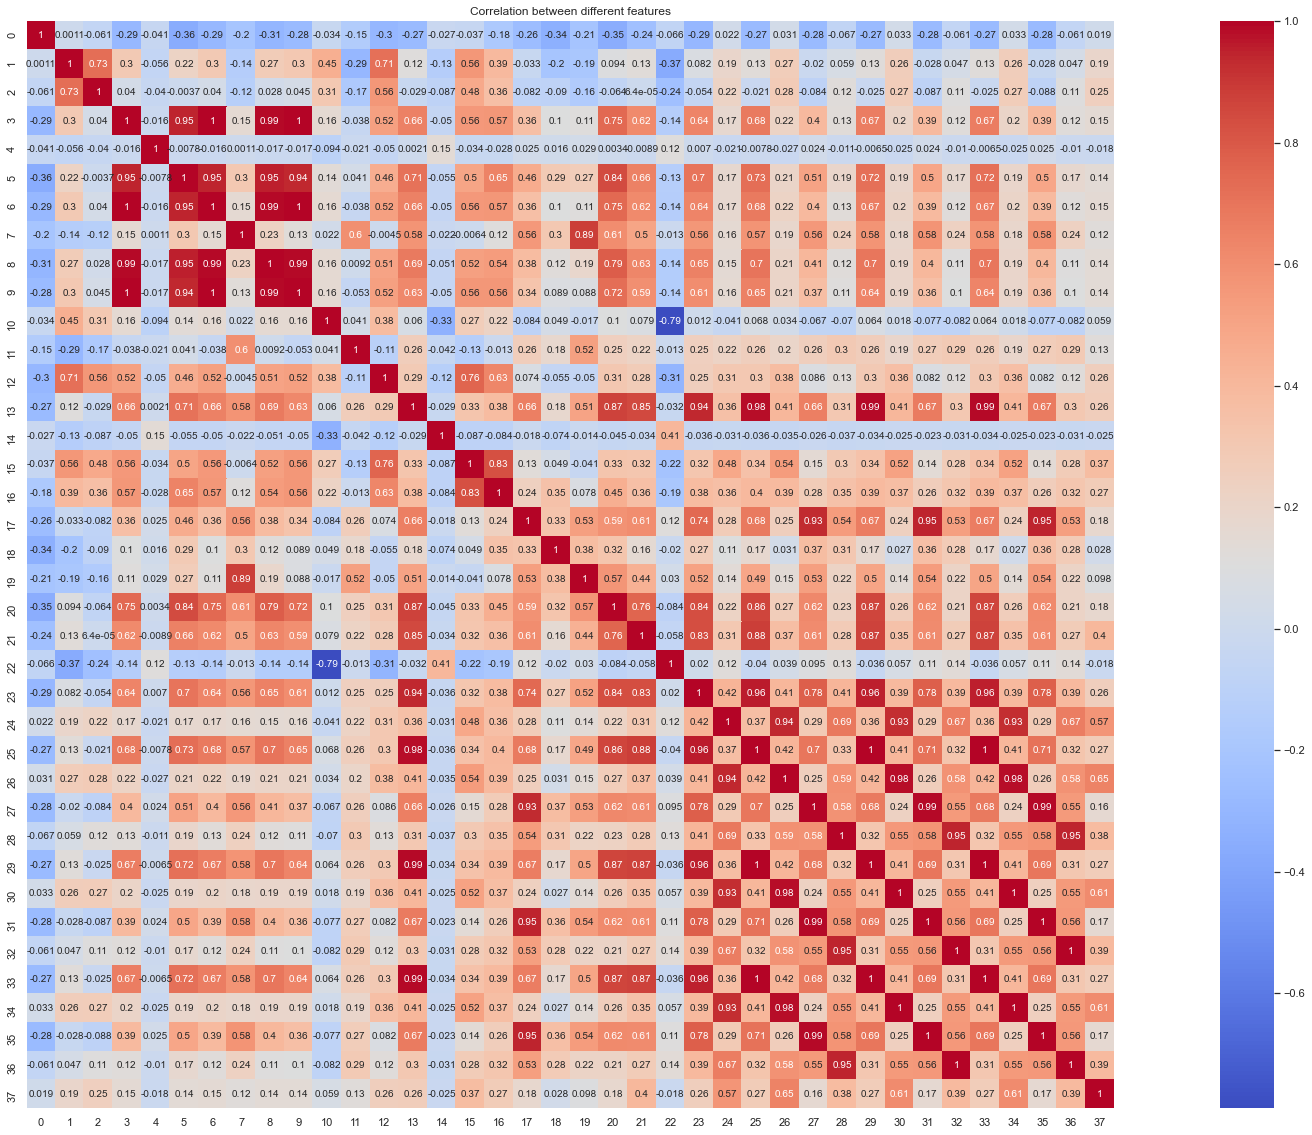

In [19]:
plt.figure(figsize=(38,20))
sns.heatmap(cov_matrix, vmax=1, square=True,annot=True,cmap='coolwarm')

plt.title('Correlation between different features')

In [20]:
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = eigh(cov_matrix)

In [21]:
egnvalues

array([5.55207040e-12, 1.87638590e-08, 3.01923960e-08, 3.77379617e-08,
       5.39276824e-05, 8.51075042e-05, 2.03342388e-03, 4.54308538e-03,
       7.32378571e-03, 7.73259432e-03, 1.32083338e-02, 2.01010843e-02,
       2.19747197e-02, 5.48015464e-02, 6.94804251e-02, 8.25422672e-02,
       9.25367092e-02, 1.04133611e-01, 1.15432712e-01, 1.51107822e-01,
       1.61738554e-01, 1.86291168e-01, 2.21325924e-01, 3.29790883e-01,
       4.30447221e-01, 5.07289905e-01, 5.94817989e-01, 6.73109910e-01,
       7.88188613e-01, 8.04505390e-01, 9.47096771e-01, 1.26803908e+00,
       1.35237909e+00, 1.97140856e+00, 2.19319257e+00, 4.97733636e+00,
       5.06832767e+00, 1.47817535e+01])

In [22]:
egnvectors

array([[-4.13832033e-07, -1.55014004e-08, -1.18900981e-05, ...,
         1.13554289e-01, -1.82666767e-02,  8.32935610e-02],
       [ 1.96674893e-07,  2.22207245e-06,  1.02110320e-05, ...,
         1.70077531e-01,  2.74094082e-01, -5.73090437e-02],
       [-1.26556420e-07, -1.96491536e-07, -4.31163327e-06, ...,
         2.26548404e-01,  1.82109307e-01, -2.30262641e-02],
       ...,
       [ 7.95985045e-07, -1.07166940e-04, -1.92196364e-06, ...,
        -8.11339340e-02, -1.85118577e-01, -2.02823484e-01],
       [-2.99042344e-07,  3.15513278e-06, -4.64801235e-05, ...,
         2.26808007e-01, -1.96904650e-01, -1.39519610e-01],
       [ 8.09721270e-09,  1.61696022e-08, -1.97960617e-07, ...,
         2.38442246e-01, -1.19010645e-02, -1.02598953e-01]])

In [23]:
#
# Determine explained variance and select the most important eigenvectors based on explained variance
#
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

Explained variance  [0.38895123681612687, 0.13336254793123134, 0.1309683001533943, 0.0577093212269768, 0.05187353416288122, 0.0355850555660798, 0.03336582263732415, 0.024920890447289186, 0.021168893514479665, 0.020739551308294083, 0.017711493530494206, 0.015651403746677634, 0.013348283441278056, 0.011326327316587136, 0.008677764209761785, 0.005823733413421199, 0.0049018663361293765, 0.004255815150571389, 0.00397608943613542, 0.0030373728096327697, 0.0027400603614241292, 0.002434911892820474, 0.0021719288463614606, 0.0018282335182322822, 0.001441989220967726, 0.0005782192468738164, 0.0005289184127251428, 0.00034754995339639916, 0.00020346720811288539, 0.00019271025618724879, 0.00011954188469654905, 5.350533906691732e-05, 2.239427746731866e-06, 1.4189952969414826e-06, 9.929963207342898e-10, 7.944503827744789e-10, 4.937320975053385e-10, 1.4609123631075194e-13]
Cumulative variance  [0.38895124 0.52231378 0.65328208 0.71099141 0.76286494 0.79845
 0.83181582 0.85673671 0.8779056  0.89864515 

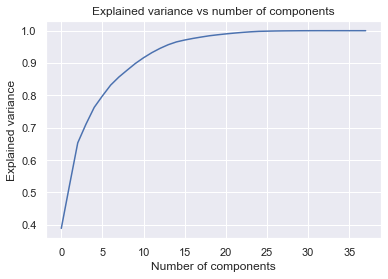

(38, 2)


In [24]:
# Get explained variance
sum_eig_val = np.sum(egnvalues)
explained_variance = var_exp
print("Explained variance ", explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative variance ", cumulative_variance)

# Plot explained variance
plt.plot(np.arange(0, len(explained_variance), 1), cumulative_variance)
plt.title("Explained variance vs number of components")
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

## We will 2 components
n_comp = 2
eig_vec = egnvectors[:,:n_comp]
print(eig_vec.shape)


In [25]:
#
# Construct projection matrix using the five eigenvectors that correspond to the top six eigenvalues (largest),
#to capture about 80% of the variance in this dataset
#
egnpairs = [(np.abs(egnvalues[i]), egnvectors[:, i])
                for i in range(len(egnvalues))]
egnpairs.sort(key=lambda k: k[0], reverse=True)
projectionMatrix = np.hstack((egnpairs[0][1][:, np.newaxis],
                              egnpairs[1][1][:, np.newaxis],
                              egnpairs[2][1][:, np.newaxis],
                              egnpairs[3][1][:, np.newaxis],
                              egnpairs[4][1][:, np.newaxis]))

In [26]:
#
# Transform the training data set
#
X_train_pca = X.dot(projectionMatrix)

In [27]:
# Create the dataframe
pca_data = pd.DataFrame(X_train_pca)

In [28]:
pca_data.head()

,0,1,2,3,4
0,2.875531,-3.109518,-1.853208,-10.635945,-0.650658
1,2.715119,-2.191329,-1.379544,-5.807143,-0.229829
2,2.885415,-3.553181,-2.185962,-13.000891,-0.997162
3,2.518846,-1.702689,-1.296973,-3.309201,-0.242876
4,2.951247,-3.122060,-1.745736,-10.687306,-0.502955


In [29]:
# kmeans = KMeans(n_clusters=2)
# labels = kmeans.fit_predict(pca_data)
pca_kmeans = pd.DataFrame(pca_data)
pca_kmeans['cluster'] = labels

In [30]:
pca_kmeans.head()

,0,1,2,3,4,cluster
0,2.875531,-3.109518,-1.853208,-10.635945,-0.650658,0.0
1,2.715119,-2.191329,-1.379544,-5.807143,-0.229829,0.0
2,2.885415,-3.553181,-2.185962,-13.000891,-0.997162,0.0
3,2.518846,-1.702689,-1.296973,-3.309201,-0.242876,0.0
4,2.951247,-3.122060,-1.745736,-10.687306,-0.502955,0.0


In [31]:
pca_kmeans.shape

(9201, 6)

In [32]:
tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(pca_data)

In [34]:
print(tsne_obj)

[[  4.8041325 -32.846344 ]
 [  0.983028  -35.211937 ]
 [  5.030603  -32.646664 ]
 ...
 [  3.7708735  24.986856 ]
 [ 88.95721    14.340855 ]
 [ -2.47387    83.392845 ]]


In [33]:
pca_tsne = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                           'cluster':labels})

<AxesSubplot:xlabel='X', ylabel='Y'>

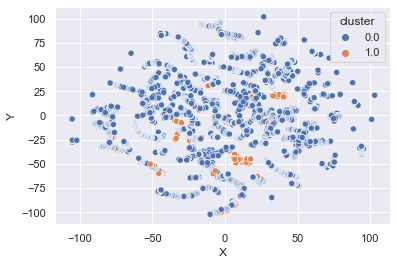

In [34]:
sns.scatterplot(x="X", y="Y",
              data=pca_tsne,
              hue='cluster',
              legend="full")

In [37]:
df1 = pca_tsne[pca_tsne['cluster']==1]

In [38]:
df2 = pca_tsne[pca_tsne['cluster']==0]

<AxesSubplot:xlabel='X', ylabel='Y'>

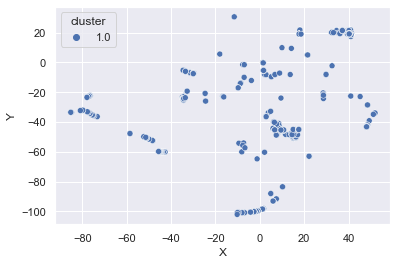

In [39]:
sns.scatterplot(x="X", y="Y",
              data=df1,
              hue='cluster',
              legend="full")

<AxesSubplot:xlabel='X', ylabel='Y'>

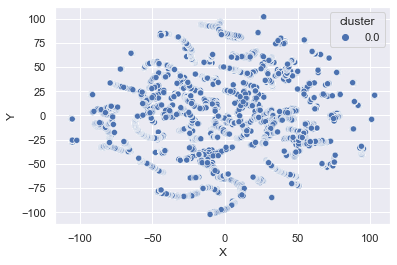

In [40]:
sns.scatterplot(x="X", y="Y",
              data=df2,
              hue='cluster',
              legend="full")